## Exercício #2
Utilizando o dataset do Spotify (disponível no repositório de apostilas da
disciplina) construa um modelo sequencial ou funcional no Keras para
fazer a classificação desse dataset.
<br>Dicas:
Tente calibrar a quantidade de camadas e neurônios a fim de atingir uma
acurácia superior a 74%;
<br>•Tente utilizar ó dropout a fim de evitar eventual overfitting.
<br>• Aplique os pré-processamentos necessários.
<br>• Apresente a evolução do conjunto de treino e validação.
<br>• Apresente a acurácia do conjunto de testes.
<br>• Apresente a configuração (estrutura) da rede neural.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DadosSpotify.csv to DadosSpotify.csv


In [363]:
import pandas as pd
import matplotlib.pyplot as plt

In [637]:
data = pd.read_csv("DadosSpotify.csv")

# Visualização inicial dos dados

In [638]:
data.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [639]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [640]:
data.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [641]:
data.target.unique()

array([1, 0])

# Feature Selection

In [642]:
data = data.iloc[:,1:15]
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [643]:
import seaborn as sb

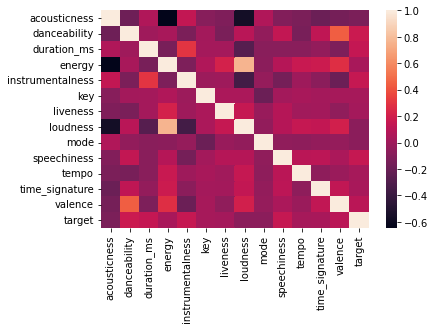

In [645]:
sb.heatmap(data.corr())

Remover loudness por sua relação com energy

In [646]:
data.drop(["loudness"], axis=1, inplace=True)

In [647]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,4.0,0.904,1


# Separação entre Features e target

In [648]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].values
y = data.iloc[:,12].values


In [649]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,4.0,0.904,1


# Features

In [650]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.01020,0.833,204600.0,0.434,0.021900,2.0,0.1650,1.0,0.4310,150.062,4.0,0.286
1,0.19900,0.743,326933.0,0.359,0.006110,1.0,0.1370,1.0,0.0794,160.083,4.0,0.588
2,0.03440,0.838,185707.0,0.412,0.000234,2.0,0.1590,1.0,0.2890,75.044,4.0,0.173
3,0.60400,0.494,199413.0,0.338,0.510000,5.0,0.0922,1.0,0.0261,86.468,4.0,0.230
4,0.18000,0.678,392893.0,0.561,0.512000,5.0,0.4390,0.0,0.0694,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404.0,0.932,0.002690,1.0,0.1290,1.0,0.3330,74.976,4.0,0.211
2013,0.08770,0.894,182182.0,0.892,0.001670,1.0,0.0528,1.0,0.1310,110.041,4.0,0.867
2014,0.00857,0.637,207200.0,0.935,0.003990,0.0,0.2140,1.0,0.1070,150.082,4.0,0.470
2015,0.00164,0.557,185600.0,0.992,0.677000,1.0,0.0913,1.0,0.1330,150.011,4.0,0.623


# Target

In [651]:
pd.DataFrame(y)

,0
0,1
1,1
2,1
3,1
4,1
...,...
2012,0
2013,0
2014,0
2015,0


In [652]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Normalização dos dados

In [653]:
X = StandardScaler().fit_transform(X)


In [654]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,0.795738,3.763084,1.066709,0.124048,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,0.795738,-0.147529,1.442323,0.124048,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,0.795738,2.183712,-1.745166,0.124048,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,0.795738,-0.740350,-1.316964,0.124048,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.256696,-0.258753,1.964120,0.124048,1.647627
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,-0.717631,-0.213815,0.342817,1.191237,-0.478206,-1.190619,-0.397929,0.795738,2.673095,-1.747715,0.124048,-1.156518
2013,-0.384304,1.711782,-0.782370,1.000961,-0.481941,-1.190619,-0.888231,0.795738,0.426383,-0.433385,0.124048,1.497911
2014,-0.688738,0.115400,-0.477129,1.205508,-0.473446,-1.464792,0.148995,0.795738,0.159447,1.067459,0.124048,-0.108504
2015,-0.715399,-0.381529,-0.740667,1.476651,1.990939,-1.190619,-0.640506,0.795738,0.448628,1.064798,0.124048,0.510593


#Separação entre treino e testes

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=50)

In [656]:
X_train.shape

(1411, 12)

# Criação do modelo

In [703]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
import pydot

In [720]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo

In [721]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Visualização gráfica do modelo

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 64)                832       
                                                                 
 dropout_86 (Dropout)        (None, 64)                0         
                                                                 
 dense_193 (Dense)           (None, 16)                1040      
                                                                 
 dense_194 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________
None


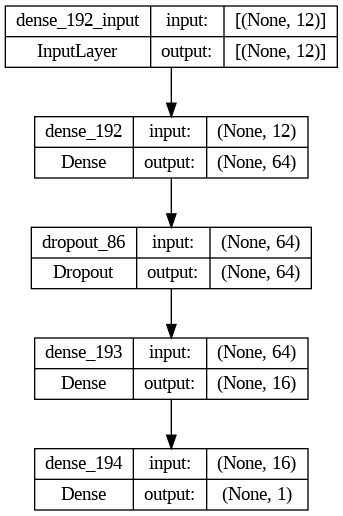

In [722]:
print(model.summary())

plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)

# Treinando o modelo

In [723]:
history  = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
142/142 [==============================] - 2s 3ms/step - loss: 0.6756 - accuracy: 0.6045
Epoch 2/100
142/142 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.6754
Epoch 3/100
142/142 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.6875
Epoch 4/100
142/142 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.6945
Epoch 5/100
142/142 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7208
Epoch 6/100
142/142 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7179
Epoch 7/100
142/142 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7222
Epoch 8/100
142/142 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7186
Epoch 9/100
142/142 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7286
Epoch 10/100
142/142 [==============================] - 0s 2ms/step - loss: 0.5404 - accura

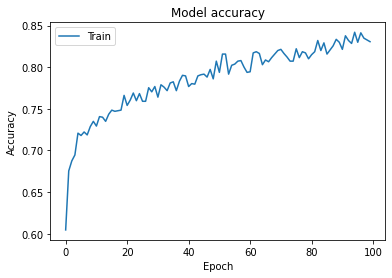

In [724]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

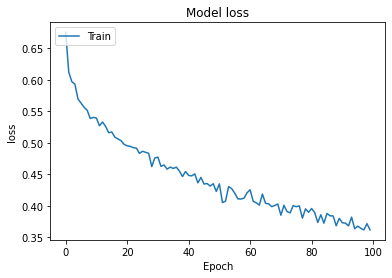

In [725]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [726]:
y_pred_out  = model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [727]:
scores = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.7228


# Acurácia

In [728]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 72.28%


In [729]:
scores

[0.668449342250824, 0.7227723002433777]

In [730]:
model.metrics_names

['loss', 'accuracy']